# Kaggle Titanic Knowledge Challenge

## By Matthew Tonks

This is a project to showcase my skills in Data Analysis and walk the reader through my thought process. I will be using python

This challege is to accurately distinguish between Passengers and find patterns in how to identify if they survived or not through this disaster. There is a training and testing files to rank teams with the testing file.

### Imports and reading the data from Kaggle

I have used each of these before in similar classification assignments 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import export_graphviz



train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Start of Data Cleaning and adding Features

I had to be careful and use pandas tools to parse character data into new usable numerical data for python to use.

In [2]:
t = pd.get_dummies(data=train, columns = ['Pclass','Sex','Embarked'])

In [3]:
t['FamilySize'] = t['SibSp'] + t['Parch']
t['FareperPerson'] = t['Fare']/ (t['FamilySize']+1)
t = t.drop(columns = ['Name','Ticket'])
t.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,FareperPerson
0,1,0,22.0,1,0,7.2500,NaN,0,0,1,0,1,0,0,1,1,3.62500
1,2,1,38.0,1,0,71.2833,C85,1,0,0,1,0,1,0,0,1,35.64165
2,3,1,26.0,0,0,7.9250,NaN,0,0,1,1,0,0,0,1,0,7.92500
3,4,1,35.0,1,0,53.1000,C123,1,0,0,1,0,0,0,1,1,26.55000
4,5,0,35.0,0,0,8.0500,NaN,0,0,1,0,1,0,0,1,0,8.05000


In [4]:
def replace_Cabin(x):
    cab = str(x['Cabin'])
    if ("A" in cab):
        return "A"
    elif ("B" in cab):
        return "B"
    elif ("C" in cab):
        return "C"
    elif ("D" in cab):
        return "D"
    elif ("E" in cab):
        return "E"
    elif ("F" in cab):
        return "F"
    elif ("F" in cab):
        return "F"
    elif ("G" in cab):
        return "G"
    else:
        return "N/A"
t['Cab'] = t.apply(replace_Cabin, axis=1)
train_clean = pd.get_dummies(data = t, columns = ['Cab'])
train_clean = train_clean.drop(columns = ['Cabin'])
train_clean.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,FamilySize,FareperPerson,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N/A
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,...,0.904602,19.916375,0.016835,0.052750,0.066218,0.037037,0.037037,0.013468,0.004489,0.772166
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,...,1.613459,35.841257,0.128725,0.223659,0.248802,0.188959,0.188959,0.115332,0.066890,0.419670
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,...,0.000000,8.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,23.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,10.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### NA values

In [5]:
train_clean.isnull().values.any()

True

The values were found in the Age column. 

I could have removed the data to keep the data integrity as intact as possible, but removing data with a relatively small data set I felt it was better to fill each of the null values with the mean age to allow for the null rows to be able to still show the useful information contained in these rows.

In [6]:
train_clean[["Age"]] = train_clean[["Age"]].fillna(train_clean[["Age"]].mean())

In [7]:
train_clean.isnull().values.any()

False

### Partitioning the data to predict Survived

In [8]:
y = train_clean['Survived']
x = train_clean.drop(columns = ['PassengerId','Survived'])

### Logistic regression

I was trained to start by using logistic regression on data

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,solver ="newton-cg",max_iter = 10000,n_jobs=-1).fit(x, y)
log_preds = clf.predict(x)

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y))]
lr_probs = clf.predict_proba(x)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.864


#### We see that the accuracy is pretty high but I believe I can do better

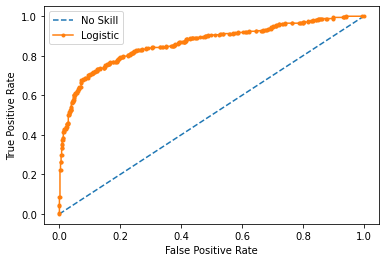

In [11]:
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, clf.predict(x)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



#### Using K Nearest Neighbor I believe I can produce a better model

There are two different weights we can use and I will be testing both to try and improve accuracy from the basic Logistic Model 

* Uniform
* Distance

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2,weights = "uniform")
neigh.fit(x, y)
neigh.score(x,y)

0.8451178451178452

#### Distance

We see a durastic improvement in accuracy

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2,weights = "distance")
neigh.fit(x, y)
neigh.score(x,y)

0.9865319865319865

In [15]:
kneigh_preds = neigh.predict(x)
train_clean['preds'] = kneigh_preds

In [16]:
print(classification_report(y, kneigh_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.97      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.98      0.99       891
weighted avg       0.99      0.99      0.99       891



## Producing my Submission

I need to add my predictions to the testing set to see how I place for this knowledge challenge. I need to submit as a csv with the passengerID and the predicted value.

In [17]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Cleaning the data to match the Training Set

In [18]:
te = pd.get_dummies(data=test, columns = ['Pclass','Sex','Embarked'])
te['FamilySize'] = te['SibSp'] + te['Parch']
te['Fare'] = te[["Fare"]].fillna(train_clean[["Fare"]].mean())
te['FareperPerson'] = te['Fare']/ (te['FamilySize']+1)
te = te.drop(columns = ['Name','Ticket'])
te.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,FareperPerson
0,892,34.5,0,0,7.8292,NaN,0,0,1,0,1,0,1,0,0,7.829200
1,893,47.0,1,0,7.0000,NaN,0,0,1,1,0,0,0,1,1,3.500000
2,894,62.0,0,0,9.6875,NaN,0,1,0,0,1,0,1,0,0,9.687500
3,895,27.0,0,0,8.6625,NaN,0,0,1,0,1,0,0,1,0,8.662500
4,896,22.0,1,1,12.2875,NaN,0,0,1,1,0,0,0,1,2,4.095833


In [19]:
te['Cab'] = te.apply(replace_Cabin, axis=1)
test_clean = pd.get_dummies(data = te, columns = ['Cab'])
test_clean = test_clean.drop(columns = ['Cabin'])
test_clean.describe()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,FamilySize,FareperPerson,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N/A
count,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.619000,0.255981,0.222488,0.521531,0.363636,0.636364,...,0.839713,21.829042,0.016746,0.043062,0.083732,0.031100,0.026316,0.014354,0.002392,0.782297
std,120.810458,14.181209,0.896760,0.981429,55.840751,0.436934,0.416416,0.500135,0.481622,0.481622,...,1.519072,35.600641,0.128474,0.203240,0.277317,0.173797,0.160265,0.119088,0.048912,0.413179
min,892.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.634400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1100.500000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,8.662500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1204.750000,39.000000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1309.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,262.375000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We need to fill null age values with the mean of the training set

In [20]:
test_clean.isnull().values.any()

True

In [21]:
test_clean.isnull().sum(axis = 0)

PassengerId       0
Age              86
SibSp             0
Parch             0
Fare              0
Pclass_1          0
Pclass_2          0
Pclass_3          0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
FamilySize        0
FareperPerson     0
Cab_A             0
Cab_B             0
Cab_C             0
Cab_D             0
Cab_E             0
Cab_F             0
Cab_G             0
Cab_N/A           0
dtype: int64

In [22]:
test_clean[["Age"]] = test_clean[["Age"]].fillna(train_clean[["Age"]].mean())

In [23]:
test_clean.isnull().values.any()

False

In [24]:
test_clean['Survived'] = neigh.predict(test_clean.drop(columns = ['PassengerId']))
test_clean.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,FareperPerson,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_N/A,Survived
0,892,34.5,0,0,7.8292,0,0,1,0,1,...,7.829200,0,0,0,0,0,0,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,...,3.500000,0,0,0,0,0,0,0,1,0
2,894,62.0,0,0,9.6875,0,1,0,0,1,...,9.687500,0,0,0,0,0,0,0,1,1
3,895,27.0,0,0,8.6625,0,0,1,0,1,...,8.662500,0,0,0,0,0,0,0,1,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,...,4.095833,0,0,0,0,0,0,0,1,0


### Export Results

In [25]:
header = ['PassengerId','Survived']
test_clean.to_csv('tonks_submission.csv', columns = header, index = False)

# Results

I scored a 0.61722 accuracy with my approach to the model. For a first attempt I will look into other modelling techniques as well as more feature engingeering that I need to add to my models. Such as filling the NA values with something more appropriate.